<h1> Test Exercise 6

In [152]:
data <- read.csv("./data/TestExer6-CARS-round2.csv")names(data)[1] <- "YEARMONTH"A

n <- nrow(data)

data$T <-c(seq(1, n))
data$YEAR <- substr(data$YEARMONTH, 1, 4)

data$DTOYOTA_SA <- c(NA, diff(data$TOYOTA_SA, lag=1))
data$DOTHER_SA <- c(NA, diff(data$OTHER_SA, lag=1))0
for (i in c(1:12)){
    data[,paste("DTOYOTA_SA_l", i, sep="")] <- c(c(rep(NA, i)), data$DTOYOTA_SA[-((n-i+1):n)])
}
for (i in c(1:3)){
    data[,paste("DOTHER_SA_l", i, sep="")] <- c(c(rep(NA, i)), data$DOTHER_SA_SA[-((n-i+1):n)])
}

data$TOYOTA_SA_l1 <- c(c(rep(NA, 1)), data$TOYOTA_SA[-((n-0):n)])
data$OTHER_SA_l1 <- c(c(rep(NA, 1)), data$OTHER_SA[-((n-0):n)]))
train <- data[data$YEAR <= 1999,]
test <- data[data$YEAR > 1999,]"

<h3> Part (a)<h3> 

$y_t$ and $x_t$ seems to be correlated. $\frac{y_t}{(y_t + x_t)}$ is rather stationary.

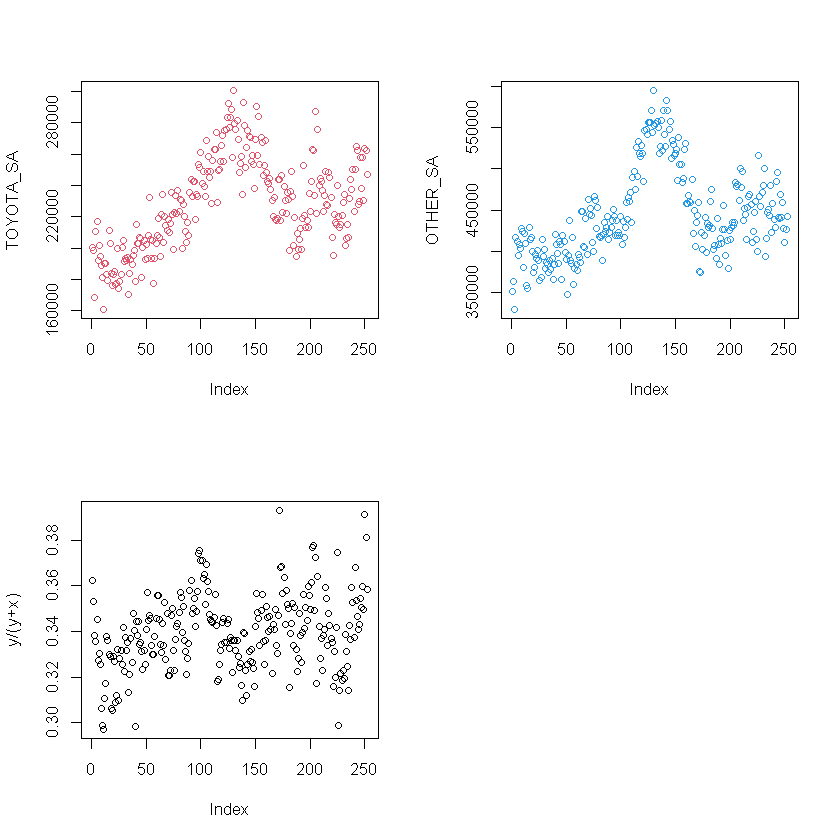

In [153]:
# attach(mtcars)
par(mfrow=c(2,2))
plot( ata$TOYOTA_SA, ylab="TOYOTA_SA", col=2)
plot(data$OTHER_SA, ylab="OTHER_SA", col=4)
plot(data$TOYOTA_SA /(data$TOYOTA_SA + data$OTHER_SA), ylab="y/(y+x)")

<h3> Part (b)</h3>

In [154]:
TOYOTA_SA_ADF <- lm(DTOYOTA_SA~ TTOYOTA_SA_l1 + DTOYOTA_SA_l1 + DTOYOTA_SA_l2 + DTOYOTA_SA_l3, data=trin)

sprintf("Formula: DTOYOTA_SA = %.3f - %.3f*TOYOTA_SA_l1* - %.3f*DTOYOTA_SA_l1* - %.3f*DTOYOTA_SA_l2* - %.3f*DTOYOTA_SA_l3*", coef(TOYOTA_SA_ADF)[1], -1*coef(TOYOTA_SA_ADF)[2], -1*coef(TOYOTA_SA_ADF)[3], -1*coef(TOYOTA_SA_ADF)[4], -1*coef(TOYOTA_SA_ADF)[5])
sprintf("")sprint("LOTOYOTA_SA_l1:")
sprintf("Coefficint = %.5f", summy(LOGTOYOTA_SA_ADF)$coefficient[2, "Estimate"])
sprintf("td. Error = %.5f", sumy(LOGITOYOTA_SA_ADF)$coefficient[2, "Std. Error"])
sprintf("t-valu = %.5f > -32.9 Do not rejec LOGIPtTOYOTA_SAis non stationary.", y(LOGIPmTOYOTA_SAADF))coefficient[32 "t value"]))

[1] "Formula: DTOYOTA_SA = 19281.893 - 0.083*TOYOTA_SA_l1* - 0.563*DTOYOTA_SA_l1* - 0.324*DTOYOTA_SA_l2* - 0.064*DTOYOTA_SA_l3*"

[1] ""

[1] "TOYOTA_SA_l1:"

[1] "Coefficient = -0.08322"

[1] "Std. Error = 0.03679"

[1] "t-value = -2.26228 > -2.9. Do not reject H0. TOYOTA_SA is non stationary."

In [155]:
OTHER_SA_ADF <- lm(DOTHER_SA ~ OTHER_SA_l1 + DOTHER_SA_l1 + DOTHER_SA_l2 + DOTHER_SA_l3, data=train)
sprintf("Formula: DOTHER_SA = %.3f - %.3f*OTHER_SA_l1* - %.3f*DOTHER_SA_l1* - %.3f*DOTHER_SA_l2* - %.3f*DOTHER_SA_l3*", coef(OTHER_SA_ADF)[1], -1*coef(OTHER_SA_ADF)[2], -1*coef(OTHER_SA_ADF)[3], -1*coef(OTHER_SA_ADF)[4], -1*coef(OTHER_SA_ADF)[5])
sprintf("")
sprintf("OTHER_SA_l1:")
sprintf("Coefficient = %.5f", summary(OTHER_SA_ADF)$coefficient[2, "Estimate"])
sprintf("Std. Error = %.5f", summary(OTHER_SA_ADF)$coefficient[2, "Std. Error"])
sprintf("t-value = %.5f > -2.9. Do not reject H0. OTHER_SA is non stationary.",summary(OTHER_SA_ADF)$coefficient[2, "t value"])

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


<h3> Part (c) </h3>

In [156]:
eg <- lm(TOYOTA_SA ~ OTHER_SA, data=train)
sprintf("Formula: *TOYOTA_SA* = %.2f + %.2f*OTHER_SA*", coef(eg)[1], coef(eg)[2])

[1] "Formula: *TOYOTA_SA* = 26786.41 + 0.45*OTHER_SA*"

In [157]:
res_data <- train
res_data$e <- summary(eg)$residuals
res_data$De <- c(NA, diff(res_data$e, lag=1))

n <- nrow(res_data)
res_data$e_l1 <- c(c(rep(NA, 1)), res_data$e[-((n-0):n)])
res_data$De_l1 <- c(c(rep(NA, 1)), res_data$De[-((n-0):n)])
res_data$De_l2 <- c(c(rep(NA, 2)), res_data$De[-((n-1):n)])
res_data$De_l3 <- c(c(rep(NA, 3)), res_data$De[-((n-2):n)])

In [158]:
res_fit <- lm(De ~ e_l1 + De_l1 + De_l2 + De_l3, data=res_data)
sprintf("Formula: De = %.3f - %.3f*e_l1* - %.3f*De_l1* - %.3f*De_l2* - %.3f*De_l3*", coef(res_fit)[1], -1*coef(res_fit)[2], -1*coef(res_fit)[3], -1*coef(res_fit)[4], -1*coef(res_fit)[5])
sprintf("t-value = %.5f < -3.4. Reject H0. TOYOTA_SA and OTHER_SA are cointegrated.", summary(res_fit)$coefficient[3, "t value"])

[1] "Formula: De = 24.992 - 0.293*e_l1* - 0.286*De_l1* - 0.142*De_l2* - 0.096*De_l3*"

[1] "t-value = -3.63959 < -3.4. Reject H0. TOYOTA_SA and OTHER_SA are cointegrated."

<h3> Part (d)</h3>

From the graph and OLS, only lags 1 to 5, 10 and 12 are significant.

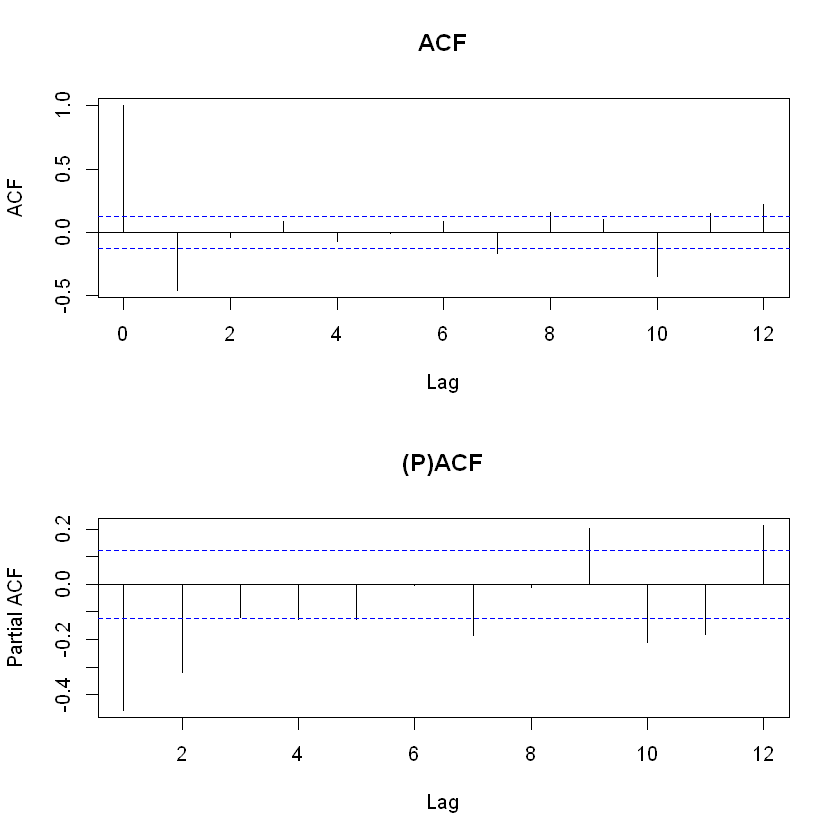

In [159]:
par(mfrow=c(2,1))
acf(na.omit(data$DTOYOTA_SA), lag.max=12, main="ACF")
pacf(na.omit(data$DTOYOTA_SA), lag.max=12, main="(P)ACF")

In [160]:
evaluate <- lm(DTOYOTA_SA ~ DTOYOTA_SA_l1 + DTOYOTA_SA_l2 + DTOYOTA_SA_l3 + DTOYOTA_SA_l4 + DTOYOTA_SA_l5 + DTOYOTA_SA_l6 + DTOYOTA_SA_l7 + DTOYOTA_SA_l8 + DTOYOTA_SA_l9 + DTOYOTA_SA_l10 + DTOYOTA_SA_l11 + DTOYOTA_SA_l12, data=train)

In [161]:
summary(evaluate)


Call:
lm(formula = DTOYOTA_SA ~ DTOYOTA_SA_l1 + DTOYOTA_SA_l2 + DTOYOTA_SA_l3 + 
    DTOYOTA_SA_l4 + DTOYOTA_SA_l5 + DTOYOTA_SA_l6 + DTOYOTA_SA_l7 + 
    DTOYOTA_SA_l8 + DTOYOTA_SA_l9 + DTOYOTA_SA_l10 + DTOYOTA_SA_l11 + 
    DTOYOTA_SA_l12, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-40387  -9196   -402   8322  33993 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    619.04050  915.32772   0.676 0.499577    
DTOYOTA_SA_l1   -0.61619    0.06668  -9.241  < 2e-16 ***
DTOYOTA_SA_l2   -0.30230    0.07886  -3.833 0.000166 ***
DTOYOTA_SA_l3   -0.25794    0.07931  -3.252 0.001331 ** 
DTOYOTA_SA_l4   -0.26978    0.08119  -3.323 0.001049 ** 
DTOYOTA_SA_l5   -0.23153    0.08357  -2.770 0.006091 ** 
DTOYOTA_SA_l6   -0.12142    0.08446  -1.438 0.152006    
DTOYOTA_SA_l7   -0.13116    0.08437  -1.555 0.121516    
DTOYOTA_SA_l8    0.04496    0.08331   0.540 0.589974    
DTOYOTA_SA_l9    0.03573    0.08186   0.437 0.662905    
DTOYOTA_SA_l10  -0

In [162]:
fit <- lm(DTOYOTA_SA ~ DTOYOTA_SA_l1 + DTOYOTA_SA_l2 + DTOYOTA_SA_l3 + DTOYOTA_SA_l4 + DTOYOTA_SA_l5 + DTOYOTA_SA_l10 + DTOYOTA_SA_l12, data=train)
sprintf("Formula:")
sprintf("Dyt = %.3f - %.3f*Dyt_l1* - %.3f*Dyt_l2* - %.3f*Dyt_l3* - %.3f*Dyt_l4* - %.3f*Dyt_l5* - %.3f*Dyt_l10* + %.3f*Dyt_l12*", coef(fit)[1], -1*coef(fit)[2], -1*coef(fit)[3], -1*coef(fit)[4], -1*coef(fit)[5], -1*coef(fit)[6], -1*coef(fit)[7], coef(fit)[8])

[1] "Formula:"

[1] "Dyt = 561.613 - 0.598*Dyt_l1* - 0.263*Dyt_l2* - 0.227*Dyt_l3* - 0.230*Dyt_l4* - 0.152*Dyt_l5* - 0.268*Dyt_l10* + 0.246*Dyt_l12*"

<h3> Part (e)</h3>

In [163]:
new_data <- data
new_data$EQ <- new_data$TOYOTA_SA_l1 - coef(eg)[2]*new_data$OTHER_SA_l1

new_train <- new_data[new_data$YEAR <= 1999,]
new_test <- new_data[new_data$YEAR > 1999,]

In [164]:
ECM_fit <- lm(DTOYOTA_SA ~ EQ + DTOYOTA_SA_l1 + DTOYOTA_SA_l2 + DTOYOTA_SA_l3 + DTOYOTA_SA_l4 + DTOYOTA_SA_l5 + DTOYOTA_SA_l10 + DTOYOTA_SA_l12, data=new_train)
sprintf("Formula:")
sprintf("Dyt = %.3f - %.3f(*yt_l1* - 0.45*xt_l1*) - %.3f*Dyt_l1* - %.3f*Dyt_l2* - %.3f*Dyt_l3* - %.3f*Dyt_l4* - %.3f*Dyt_l5* - %.3f*Dyt_l10* + %.3f*Dyt_l12*", coef(ECM_fit)[1], -1*coef(ECM_fit)[2], -1*coef(ECM_fit)[3], -1*coef(ECM_fit)[4], -1*coef(ECM_fit)[5], -1*coef(ECM_fit)[6], -1*coef(ECM_fit)[7], coef(ECM_fit)[8], coef(ECM_fit)[9])

[1] "Formula:"

[1] "Dyt = 4602.114 - 0.150(*yt_l1* - 0.45*xt_l1*) - 0.523*Dyt_l1* - 0.187*Dyt_l2* - 0.158*Dyt_l3* - 0.185*Dyt_l4* - 0.133*Dyt_l5* - -0.274*Dyt_l10* + 0.252*Dyt_l12*"

In [165]:
rsq_0 <- as.numeric(summary(fit)$r.squared)
rsq_1 <- as.numeric(summary(ECM_fit)$r.squared)
n <- nrow(na.omit(train))
g <- 1 #no. of excluded variables
k <- 9 #total number of variables in unrestricted model
F5 <- (rsq_1 - rsq_0) * (n - k) / (1 - rsq_1) / g

sprintf("Critical value at 5%% level=%.3f", qf(.95, df1=g, df2=n-k))
sprintf("Critical value at 1%% level=%.3f", qf(.99, df1=g, df2=n-k))

sprintf("F = %.3f > 3.9, therefore reject H0 at 5%% level", F)
sprintf("F = %.3f < 6.8, therefore do not reject H0 at 1%% level", F)

Warning message in qf(0.95, df1 = g, df2 = n - k):
"NaNs produced"


[1] "Critical value at 5% level=NaN"

Warning message in qf(0.99, df1 = g, df2 = n - k):
"NaNs produced"


[1] "Critical value at 1% level=NaN"

[1] "F = 4.630 > 3.9, therefore reject H0 at 5% level"

[1] "F = 4.630 < 6.8, therefore do not reject H0 at 1% level"

<h3> Part (f)</h3>

In [166]:
result <- test[,c("YEAR","DTOYOTA_SA")]

In [167]:
result$AR <- predict(fit, newdata=new_test)
result$ECM <- predict(ECM_fit, newdata=new_test)

In [168]:
result_error <- result
result_error$AR <- result_error$DTOYOTA_SA - result_error$AR
result_error$ECM <- result_error$DTOYOTA_SA - result_error$ECM

In [169]:
n <- nrow(result_error)

for (col in c("AR", "ECM")){
    values <- result_error[, col]
    print(col)
    print(eval(sprintf("RMSE = %.5f", sqrt(1/n*sum(values**2)))))
    print(eval(sprintf("MAE = %.5f", 1/n*sum(abs(values)))))
    print("")
}

[1] "AR"
[1] "RMSE = 16991.79876"
[1] "MAE = 14703.21887"
[1] ""
[1] "ECM"
[1] "RMSE = 18202.60915"
[1] "MAE = 15552.91652"
[1] ""


AR model (without the Error Correction) does better in the out-of-sample set with lower RMSE and MAE. 